<a href="https://colab.research.google.com/github/UrielAnd/Inteligancia_Artificial/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip -q install yellowbrick # Biblioteca para gráficos

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier
import pydotplus

In [ ]:
import pickle
with open("restaurante.pkl", "rb") as f:
  X_treino, X_teste, Y_treino, Y_teste = pickle.load(f)

In [ ]:
modelo = DecisionTreeClassifier(criterion='entropy')
modelo.fit(X_treino, Y_treino) # O fit treina minha árvore

DecisionTreeClassifier(criterion='entropy')

In [ ]:
modelo.feature_importances_

array([0.59531747, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.22422318,
       0.        , 0.        , 0.        , 0.18045935, 0.        ])

In [ ]:
previsoes = modelo.predict(X_teste) # Passo o X de teste para testar
previsoes

array(['Não', 'Não', 'Não'], dtype=object)

In [ ]:
Y_teste

array(['Não', 'Sim', 'Não'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy_score(Y_teste, previsoes)

0.6666666666666666

0.6666666666666666

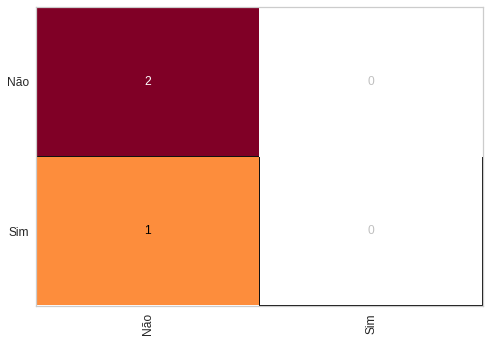

In [ ]:
from yellowbrick.classifier import ConfusionMatrix # Importando biblioteca de matriz de confusão
confusion_matrix(Y_teste, previsoes)

cm = ConfusionMatrix(modelo) # Matriz de Confusão Visualmente
cm.fit(X_treino, Y_treino)
cm.score(X_teste, Y_teste)

In [ ]:
print(classification_report(Y_teste, previsoes))

              precision    recall  f1-score   support

         Não       0.67      1.00      0.80         2
         Sim       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


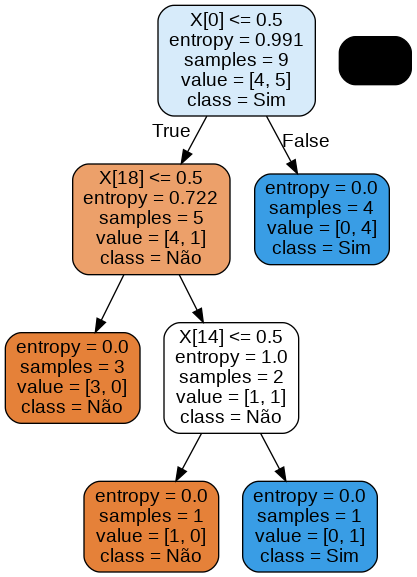

In [ ]:
from sklearn import tree
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = tree.export_graphviz(modelo, out_file=None, feature_names = None, class_names = modelo.classes_, rounded = True, filled = True)                       

graph = pydotplus.graph_from_dot_data(dot_data) #provides a Python Interface to Graphviz's Dot language.
Image(graph.create_png()) #criando a imagem

In [ ]:
from google.colab import drive
drive.mount('/content/drive')